In [33]:
!pip install minisom

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
dataset = pd.read_csv('Credit_Card_Applications.csv')

In [0]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))

In [0]:
x = sc.fit_transform(x)

In [87]:
x.shape

(690, 15)

# training the SOM 

In [0]:
from minisom import MiniSom    

In [0]:
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)

In [0]:
som.random_weights_init(x)
som.train_random(x, 100)

# Visualizing Results

In [0]:
from pylab import bone, pcolor, colorbar, plot, show

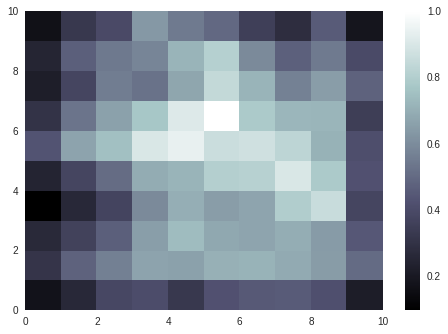

In [92]:
bone()
pcolor(som.distance_map().T)
colorbar()

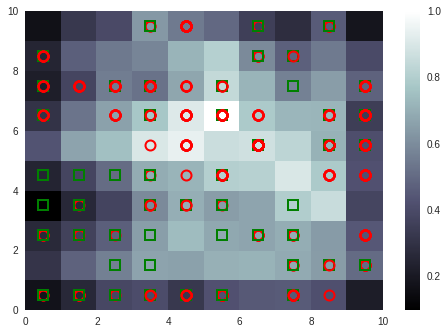

In [93]:
bone()
pcolor(som.distance_map().T)
colorbar()

markers = ['o', 's']
colors = ['r', 'g']

for i, l in enumerate(x):
  w = som.winner(l)
  plot(w[0] + 0.5, 
       w[1] + 0.5, 
       markers[y[i]], 
       markeredgecolor = colors[y[i]], 
       markerfacecolor = 'None', 
       markersize = 10, 
       markeredgewidth = 2)
show()

# finding the frauds

In [0]:
mappings = som.win_map(x)

In [0]:
frauds = np.concatenate((mappings[(5, 6)], mappings[(5, 7)]), axis = 0)

In [98]:
frauds = sc.inverse_transform(frauds)

ValueError: ignored

In [32]:
frauds

array([[1.5580914e+07, 1.0000000e+00, 5.2330000e+01, 1.3750000e+00,
        1.0000000e+00, 8.0000000e+00, 8.0000000e+00, 9.4600000e+00,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 2.0000000e+02, 1.0100000e+02],
       [1.5684512e+07, 1.0000000e+00, 4.2500000e+01, 4.9150000e+00,
        1.0000000e+00, 9.0000000e+00, 4.0000000e+00, 3.1650000e+00,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 5.2000000e+01, 1.4430000e+03],
       [1.5664615e+07, 1.0000000e+00, 3.3170000e+01, 1.0400000e+00,
        2.0000000e+00, 1.2000000e+01, 8.0000000e+00, 6.5000000e+00,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 1.6400000e+02, 3.1286000e+04],
       [1.5607986e+07, 1.0000000e+00, 4.0920000e+01, 2.2500000e+00,
        1.0000000e+00, 1.4000000e+01, 8.0000000e+00, 1.0000000e+01,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00,